<a href="https://colab.research.google.com/github/Muskan2320/Classification/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction

This lab file works on the breast cancer dataset from the sklearn datasets. This dataset has nearly 30 features but operations on such large number of features require a lot of computations while some of features may not hold that much importance to the target variable.

Principal Component Analysis is used to find the features with higher importance and hence, classifying each sample to have either 'Benign' or 'Malignant' that describes the condition to be not cancerous and cancerous respectively.

Warning library is used to control the warnings of the commands executed. Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program, where that condition (normally) doesn’t warrant raising an exception and terminating the program.

In [ ]:
import warnings
warnings.filterwarnings('ignore')                                               # This removes all the warnings from the output

In [ ]:
# The 'Pandas' package is a fast, flexible tool used to analyze data. It helps in reading and updating the files like csv files, excel, etc.
import pandas as pd

# NumPy is used to deal with matrix
import numpy as np

# The 'matplotlib' is a visualization package. It is used for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# Seaborn is a visualization library based on the matplotlib. Seaborn is the superset of matplotlib. It can be used for drawing attractive and informative statistical graphics.
import seaborn as sns

In [ ]:
# Load dataset from sklearn datasets
from sklearn.datasets import load_breast_cancer

# Get the features or columns of dataset
features = load_breast_cancer().data

# Get the labels of each row that is 'Benign' or 'Malignant'
labels = np.reshape(load_breast_cancer().target, (569,1))

data = np.concatenate([features, labels], axis=1)                               # Join the feature columns and label column
data = pd.DataFrame(data)                                                       # Convert to dataframe

# Get column or feature names
col_name = load_breast_cancer().feature_names                                   # col_name is a ndarray consisting names of different features
col_name = np.append(col_name, 'label')                                         # Appending the 'label' column that is the name of the target column
# OR
# col_name = list(load_breast_cancer().feature_names)
# col_name.append('label')

data.columns = col_name                                                         # Assigning column names to the dataframe
print(data.shape)                                                               # Get shape of data
data.head(1)                                                                    # Get first row of data

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0.0


In [ ]:
print(col_name)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'label']


# Defining target variable

In [ ]:
X = data.drop(['label'], axis=1)
Y = data['label']

In [ ]:
X.shape, Y.shape

((569, 30), (569,))

# Applying PCA for extracting important features

## Standardization of data

Normalizing the data to unit variance or standard deviation

In [ ]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)                                       # scale data to unit standard deviation
                                                                                # fit_transform() -> Fit to data, then transform it

np.std(X_std)                                                                   # Get standard deviation

1.0

## Computing covariance matrix

In [ ]:
mean_vec = np.mean(X_std, axis=0)                                               # Calculating mean for each feature

# Covariance matrix measure of how much two random variables gets change together. It's diagonal gives the individual variances.
# .T -> Transpose the matrix
# .dot -> Gives the dot product
covariance_matrix = 1/ (X_std.shape[0] - 1) * (X_std - mean_vec).T.dot(X_std - mean_vec)        # OR np.cov(X_std.T)

## Calculating eigenvectors and eigenvalues

Eigen vectors are called principal components

In [ ]:
# numpy has 'linalg' module that is linear algebra module. This module has eig() function which returns the eigen vectors and their corresponding eigen values.
eigen_val, eigen_vec = np.linalg.eig(covariance_matrix)

## Computing Principal Components

In [ ]:
eigen_pair = []

for i in range(len(eigen_val)):
  eigen_pair.append((np.abs(eigen_val[i]), eigen_vec[i]))                       # Appending pairs of eigen value and eigen vector to te list. np.abs() return the absolute value

eigen_pair.sort(key=lambda x: x[0], reverse=True)                               # Sort the pairs of list on the basis of eigen value in descending order

print("First three eigen_values: ")
eigen_pair[0][0], eigen_pair[1][0], eigen_pair[2][0]

First three eigen_values: 


(13.304990794374568, 5.701374603726145, 2.8229101550062325)

Ploting Scree Plot

Visualize the percentage of variation explained by each principal component scree plot is created

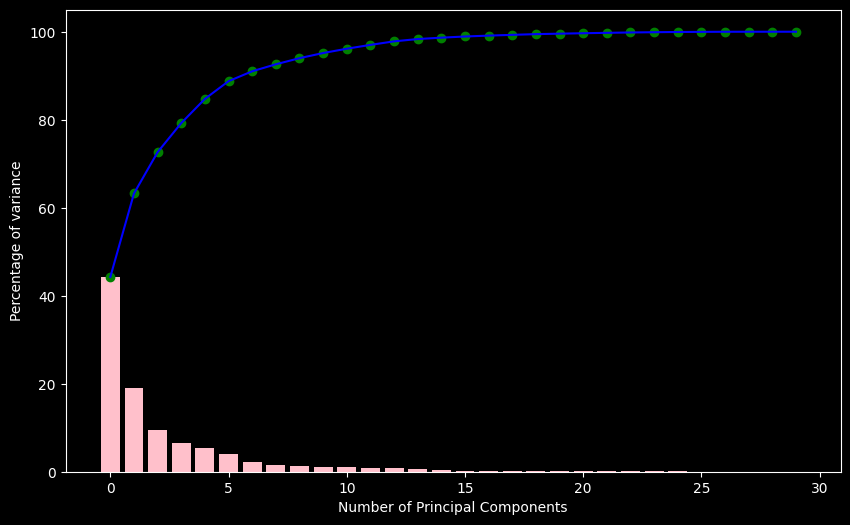

In [ ]:
total = np.sum(eigen_val)
eig_val = 100* eigen_val/total                                                  # Finding percentage of each eigen value
eig_val = sorted(eig_val, reverse=True)                                         # Sort percentage in descending order

with plt.style.context('dark_background'):
  plt.figure(figsize = (10,6))                                                  # Adjust the figure size
  plt.xlabel("Number of Principal Components")                                  # Label the x-axis
  plt.ylabel("Percentage of variance")                                          # Label the y-axis
  plt.bar(range(30), eig_val[:30], color = 'pink')                              # Plot the bar plot
  plt.plot(range(30), np.cumsum(eig_val[:30]), color = 'blue')                  # Plot scree plot displaying cummulative sum of percentages
  plt.scatter(range(30), np.cumsum(eig_val[:30]), color = 'green')              # Plot scatter plot

## Reducing dimensions of dataset

In [ ]:
# hstack places the first six eigen vectors or principal components in column wise manner
# For example, given list [1,2] hstacking them gives [[1,1], [2,2]]
matrix = np.hstack((eigen_pair[0][1].reshape(30,1),
                    eigen_pair[1][1].reshape(30,1),
                    eigen_pair[2][1].reshape(30,1),
                    eigen_pair[3][1].reshape(30,1),
                    eigen_pair[4][1].reshape(30,1),
                    eigen_pair[5][1].reshape(30,1),))

reduced = X_std.dot(matrix)
print(reduced)

[[ 5.01661220e-01 -1.39557832e+00 -8.35384002e-01  2.24501418e+00
  -3.38985795e-01 -1.18462561e-01]
 [-2.58645613e-01 -1.65766184e+00 -3.41466902e-01  1.24420920e+00
   6.12820419e-02 -1.68527252e-03]
 [-2.95343369e-01 -1.56418753e+00 -9.07330588e-01  5.64335703e-01
   1.12565718e+00  3.73454675e-01]
 ...
 [-3.30000240e-01 -1.30750684e-01 -6.21118313e-01 -4.53746600e-01
   6.13898455e-01 -2.86931158e-02]
 [ 1.36849571e-01 -1.61401230e+00 -1.65591623e+00  5.62239201e-01
   2.34497684e+00 -2.89380334e-01]
 [ 2.59752061e-01  5.93863538e-01  1.06851396e+00 -1.42412279e+00
  -2.06030722e+00  1.18223730e+00]]


In [ ]:
# Creating a new reduced dataframe with first five mot important principal components
reduced_data = pd.DataFrame(columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Label'])

for i in range(len(reduced)):
  dic = dict()

  dic['PC1'] = reduced[i, 0]
  dic['PC2'] = reduced[i, 1]
  dic['PC3'] = reduced[i, 2]
  dic['PC4'] = reduced[i, 3]
  dic['PC5'] = reduced[i, 4]

  if labels[i][0] == 0:
    dic['Label'] = 'Benign'
  else:
    dic['Label'] = 'Malignant'

  reduced_data = reduced_data.append(dic, ignore_index = True)

reduced_data.head()

,PC1,PC2,PC3,PC4,PC5,Label
0,0.501661,-1.395578,-0.835384,2.245014,-0.338986,Benign
1,-0.258646,-1.657662,-0.341467,1.244209,0.061282,Benign
2,-0.295343,-1.564188,-0.907331,0.564336,1.125657,Benign
3,1.823849,-1.630373,-0.903780,-0.519178,1.203066,Benign
4,0.130931,-1.186539,-0.642647,1.581072,-0.010264,Benign


In [ ]:
reduced_data['Label'].value_counts()                                            # Get the count of each unique category in column

Malignant    357
Benign       212
Name: Label, dtype: int64

# Split data

Define dependent and independent variable of data

In [ ]:
X = reduced_data.drop(['Label'], axis=1)
Y = reduced_data['Label']

Split the data in test data and training data

In [ ]:
from sklearn.model_selection import train_test_split

# Specifying the test size to 0.3 means splitting the data in 70% train data and 30% test data. It can also be done using train_size = 0.3
# Specifying the random_state means specifying the seed as row are assigned to train and test set randomly.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 24)

# Model

We are using logistic regression for prediction. Though the name says regression but it is generally used for binary classification problem.

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)                                                     # Train model on train dataset

LogisticRegression()

## Prediction

In [ ]:
y_pred = model.predict(X_test)                                                  # Predict the label on test data

print("Accuracy:", model.score(X_test, Y_test))                                 # Get the accuracy of model

Accuracy: 0.9707602339181286


## Visualization

<Axes: xlabel='Label', ylabel='Probability'>

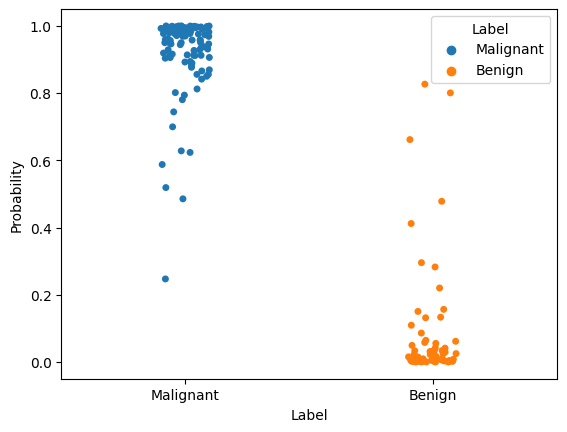

In [ ]:
# Return probablities of each classification label in the form of nd-array (prob(0), prob(1)) that is probability of occurring and not occurring of each label
y_prob = model.predict_proba(X_test)

visual = {'Probability':y_prob[:, 1], 'Label':Y_test}
df = pd.DataFrame(visual)

sns.stripplot(x='Label', y='Probability', data=df, hue='Label')

In [ ]:
# By default the threshold is 0.5. Label is 1 for greater than 0.5 and 0 for less than 0.5
# Here, It is changed to 0.48 for better classification

y_predict = (model.predict_proba(X_test)[:, 1] >= 0.48).astype(int)

y_pred_class = []
for i in range(len(y_pred)):
  if y_predict[i] == 1:
    y_pred_class.append('Malignant')
  else:
    y_pred_class.append('Benign')

#Evaluation

Model gives the accuracy of 97.6% on the unseen data

Accuracy: 0.9766081871345029


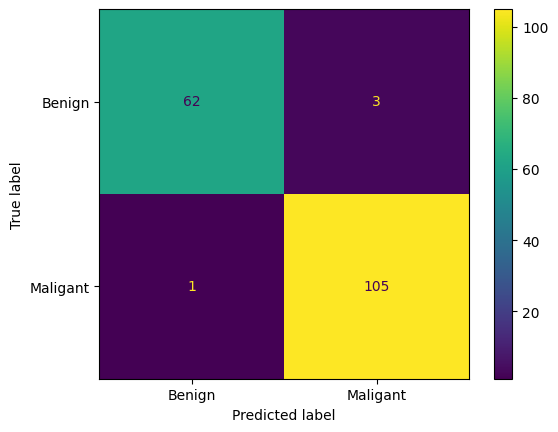

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("Accuracy:", accuracy_score(Y_test, y_pred_class))                        # It return the accuracy score

matrix = confusion_matrix(Y_test, y_pred_class)                                 # It creates the confusion matrix
cm = ConfusionMatrixDisplay(matrix, display_labels = ['Benign', 'Maligant'])    # It displays the confusion matrix
cm.plot()